<a href="https://colab.research.google.com/github/holdenkim/codingT/blob/main/Self_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 다운로드 및 기술 통계량 분석

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c titanic

import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('Data Loading is done!')

train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
Data Loading is done!


In [ ]:
test.shape

(418, 6)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 데이터 사전 처리

The value of mu before log transformation is: 32.204207968574636
The value of sigma before log transformation is: 49.6655344447741


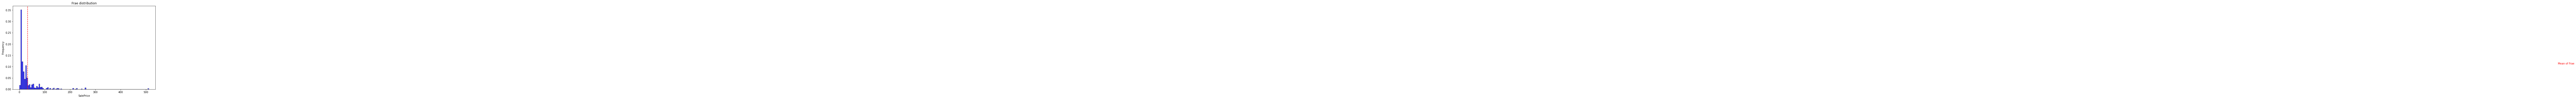

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

(mu, sigma) = norm.fit(train['Fare'])
print("The value of mu before log transformation is:", mu)
print("The value of sigma before log transformation is:", sigma)

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(train['Fare'], color="b", stat="probability")
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="Frae distribution")

plt.axvline(mu, color='r', linestyle='--')
plt.text(mu + 10000, 0.11, 'Mean of Frae', rotation=0, color='r')
fig.show()

The value of mu before log transformation is: 2.9622457416890815
The value of sigma before log transformation is: 0.968504319324457


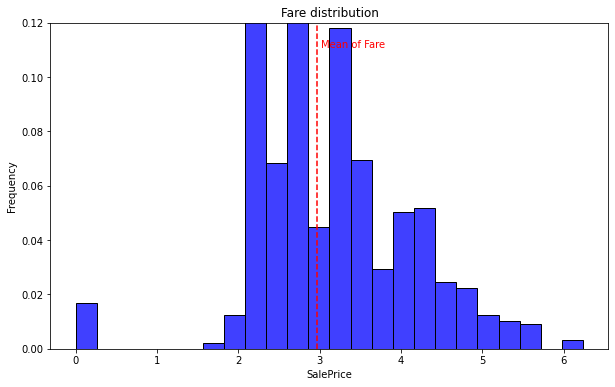

In [ ]:
import numpy as np 

train["Fare"] = np.log1p(train["Fare"])

(mu, sigma) = norm.fit(train['Fare'])
print("The value of mu before log transformation is:", mu)
print("The value of sigma before log transformation is:", sigma)

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(train['Fare'], color="b", stat="probability")
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="Fare distribution")

plt.axvline(mu, color='r', linestyle='--')
plt.text(mu + 0.05, 0.111, 'Mean of Fare', rotation=0, color='r')
plt.ylim(0, 0.12)
fig.show()

In [ ]:
#로그 변환
train["Fare"] = np.log1p(train["Fare"])
train["Age"] = np.log1p(train["Age"])


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,3.135494,1,0,A/5 21171,2.110213,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.663562,1,0,PC 17599,4.280593,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,3.295837,0,0,STON/O2. 3101282,2.188856,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.583519,1,0,113803,3.990834,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,3.583519,0,0,373450,2.202765,NaN,S


In [ ]:
test.shape

(418, 6)

In [ ]:
train_ID = train['PassengerId']
test_ID = test['PassengerId']
train.drop(['PassengerId'], axis=1, inplace=True)
test.drop(['PassengerId'], axis=1, inplace=True)

In [ ]:
train.drop(['Ticket'], axis=1, inplace=True)
train.drop(['Cabin'], axis=1, inplace=True)
train.drop(['Embarked'], axis=1, inplace=True)
train.drop(['Name'], axis=1, inplace=True)
test.drop(['Name'], axis=1, inplace=True)
test.drop(['Ticket'], axis=1, inplace=True)
test.drop(['Cabin'], axis=1, inplace=True)
test.drop(['Embarked'], axis=1, inplace=True)

KeyError: ignored

In [ ]:
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,3.135494,1,0,2.110213
1,1,female,3.663562,1,0,4.280593
2,3,female,3.295837,0,0,2.188856
3,1,female,3.583519,1,0,3.990834
4,3,male,3.583519,0,0,2.202765


In [ ]:
test.shape

(418, 6)

In [ ]:
y = train['Survived'].reset_index(drop=True)
train = train.drop('Survived', axis = 1)
train.shape, test.shape, y.shape

((891, 7), (418, 7), (891,))

In [ ]:
all_df = pd.concat([train, test]).reset_index(drop=True)
all_df.shape

(1309, 6)

In [ ]:
all_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,3.135494,1,0,2.110213
1,1,female,3.663562,1,0,4.280593
2,3,female,3.295837,0,0,2.188856
3,1,female,3.583519,1,0,3.990834
4,3,male,3.583519,0,0,2.202765


In [ ]:
all_df = all_df.replace({'male':0, "female":1})

In [ ]:
all_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,3.135494,1,0,2.110213
1,1,1,3.663562,1,0,4.280593
2,3,1,3.295837,0,0,2.188856
3,1,1,3.583519,1,0,3.990834
4,3,0,3.583519,0,0,2.202765


In [ ]:
def check_na(data, head_num = 6):
  isnull_na = (data.isnull().sum() / len(data)) * 100
  data_na = isnull_na.drop(isnull_na[isnull_na == 0].index).sort_values(ascending=False)
  missing_data = pd.DataFrame({'Missing Ratio' :data_na, 
                               'Data Type': data.dtypes[data_na.index]})
  print("결측치 데이터 컬럼과 건수:\n", missing_data.head(head_num))

check_na(all_df, 20)

결측치 데이터 컬럼과 건수:
       Missing Ratio Data Type
Age       20.091673   float64
Fare       0.076394   float64


In [ ]:
all_df.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,3.135494,1,0,2.110213
1,1,1,3.663562,1,0,4.280593


In [ ]:
from sklearn.impute import SimpleImputer
imp = Imputerimp = SimpleImputer(strategy='median')
X = imp.fit_transform(all_df)

In [ ]:
type(X)
X.shape
#((891, 7), (418, 7), (891,))

(1309, 6)

In [ ]:
train_input = X[0:891,:]
test_input = X[891:,:]

In [ ]:
print(train_input.shape)
print(test_input.shape)
print(y.shape)

(891, 6)
(418, 6)
(891,)


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_input,y )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
result = lr.predict(test_input)

In [ ]:
result.shape

(418,)

In [ ]:
sample = pd.read_csv('gender_submission.csv')

In [ ]:
sample.shape

(418, 2)

In [ ]:
sampe.iloc[:,1] = result

In [ ]:
print(sample.head())


   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


In [ ]:
sample.to_csv("The_rfc_1st.csv", index=False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(train_input,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
result = rfc.predict(test_input)